In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import os 

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 140)

# Plot defaults
plt.rcParams["figure.figsize"] = (10, 5)
sns.set_style("whitegrid")

## Load Datasets

In [2]:
data_dir = '../data'
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/reviews.csv
../data/neighbourhoods.geojson
../data/test.csv
../data/calendar.csv
../data/train.csv
../data/sample_submission.csv


In [3]:
try:
    train_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))
    test_df = pd.read_csv(os.path.join(data_dir, 'test.csv'))
    reviews_df = pd.read_csv(os.path.join(data_dir, 'reviews.csv'))
    calendar_df = pd.read_csv(os.path.join(data_dir, 'calendar.csv'))
    sample_submission_df = pd.read_csv(os.path.join(data_dir, 'sample_submission.csv'))
    print("All datasets loaded successfully.")
    print("Train shape:", train_df.shape)
    print("Test shape:", test_df.shape)
    print("Reviews shape:", reviews_df.shape)
    print("Calendar shape:", calendar_df.shape)
except FileNotFoundError as e:
    print(f"Error loading files: {e}")

All datasets loaded successfully.
Train shape: (24153, 58)
Test shape: (4750, 56)
Reviews shape: (516034, 2)
Calendar shape: (10817505, 5)


## Explore Train Data

In [4]:
display(train_df.head(3))

,Unnamed: 0.1,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,0,25436,https://www.airbnb.com/rooms/25436,20250627144659,2025-06-28,previous scrape,In the forest Sea view Two minutes to the city.,Our house is in Baby Koru. If you want village...,Clean and elegand friends . U can find everyth...,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,https://www.airbnb.com/users/show/105823,Yesim,2010-04-09,"İstanbul, Turkey","Merhabalar . Kuş sesi , akan su sesi ile uyan...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/067a8...,https://a0.muscache.com/im/pictures/user/067a8...,Beşiktaş,1.0,1.0,"['email', 'phone']",t,t,"Beşiktaş/ bebek, İstanbul, Turkey",Besiktas,NaN,41.07883,29.03863,Entire rental unit,Entire home/apt,3,NaN,1 bath,2.0,NaN,"[""Room-darkening shades"", ""Wine glasses"", ""Sel...",NaN,100,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0
1,1,1,34177,https://www.airbnb.com/rooms/34177,20250627144659,2025-07-01,city scrape,PETIT HOUSE,My petit house is located in the bosphorous an...,the neighbourhood is very calm comparing the...,https://a0.muscache.com/pictures/47356451/c288...,147330,https://www.airbnb.com/users/show/147330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Beşiktaş, İstanbul, Turkey",Besiktas,NaN,41.06681,29.04035,Entire home,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Free dryer \u2013 In unit"", ""Extra pillows a...","1,794.00",100,365,4.69,4.69,4.88,4.88,4.81,4.69,4.81,NaN,f,5,5,0,0
2,2,2,42835,https://www.airbnb.com/rooms/42835,20250627144659,2025-06-28,previous scrape,Cozy apartment in the heart of Istanbul,Welcome to our cozy 2-bedroom apartment locate...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,187026,https://www.airbnb.com/users/show/187026,Attila,2010-07-31,"Istanbul, Turkey",I am from Istanbul/ Turkey. I will do my best ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/187026/profil...,https://a0.muscache.com/im/users/187026/profil...,Şişli,3.0,3.0,"['email', 'phone']",t,t,NaN,Sisli,NaN,41.04303,28.98531,Entire rental unit,Entire home/apt,4,NaN,2 baths,1.0,NaN,"[""Wine glasses"", ""Laundromat nearby"", ""Cleanin...",NaN,100,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,1,2,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24153 entries, 0 to 24152
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0.1                                  24153 non-null  int64  
 1   Unnamed: 0                                    24153 non-null  int64  
 2   id                                            24153 non-null  int64  
 3   listing_url                                   24153 non-null  object 
 4   scrape_id                                     24153 non-null  int64  
 5   last_scraped                                  24153 non-null  object 
 6   source                                        24153 non-null  object 
 7   name                                          24153 non-null  object 
 8   description                                   23501 non-null  object 
 9   neighborhood_overview                         6905 non-null  

In [6]:
train_df.describe()

,Unnamed: 0.1,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,24153.000000,24153.000000,2.415300e+04,2.415300e+04,2.415300e+04,23485.000000,23485.000000,0.0,24153.000000,24153.000000,24153.000000,20839.000000,23639.000000,20871.000000,24153.000000,24153.000000,15052.000000,15050.000000,15052.000000,15050.000000,15052.000000,15050.000000,15049.000000,24153.000000,24153.000000,24153.000000,24153.000000
mean,12076.000000,14850.732621,8.485073e+17,2.025063e+13,3.512887e+08,26.026570,29.657654,NaN,41.029320,28.972679,3.538981,1.212630,1.521384,2.095875,58.221380,470.528878,4.582673,4.615631,4.536973,4.720405,4.740084,4.644599,4.541681,23.771830,21.446156,2.179522,0.033039
std,6972.514862,8554.309302,4.721010e+17,0.000000e+00,2.045644e+08,82.050365,100.810116,NaN,0.048364,0.154331,2.177697,0.901427,1.643558,2.204290,61.847969,310.405535,0.691445,0.666244,0.708628,0.612142,0.597183,0.595877,0.684091,79.558098,79.817644,5.484710,0.300686
min,0.000000,0.000000,2.543600e+04,2.025063e+13,1.058230e+05,1.000000,1.000000,NaN,40.815460,28.007570,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6038.000000,7445.000000,6.634897e+17,2.025063e+13,1.659560e+08,2.000000,2.000000,NaN,41.005032,28.965280,2.000000,1.000000,1.000000,1.000000,2.000000,365.000000,4.510000,4.570000,4.470000,4.750000,4.770000,4.570000,4.500000,1.000000,1.000000,0.000000,0.000000
50%,12076.000000,14932.000000,9.490009e+17,2.025063e+13,4.110136e+08,5.000000,7.000000,NaN,41.031507,28.980280,3.000000,1.000000,1.000000,2.000000,100.000000,365.000000,4.800000,4.830000,4.760000,4.920000,4.940000,4.830000,4.740000,5.000000,2.000000,0.000000,0.000000
75%,18114.000000,22277.000000,1.233129e+18,2.025063e+13,5.085327e+08,14.000000,17.000000,NaN,41.048843,29.004379,4.000000,1.000000,2.000000,3.000000,100.000000,365.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.940000,13.000000,10.000000,2.000000,0.000000
max,24152.000000,29636.000000,1.452164e+18,2.025063e+13,7.034169e+08,750.000000,5373.000000,NaN,41.486680,29.870790,16.000000,50.000000,50.000000,54.000000,999.000000,9999.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,530.000000,530.000000,60.000000,8.000000


In [7]:
print("Missing Values in Train Data:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])

Missing Values in Train Data:
description                       652
neighborhood_overview           17248
host_name                         660
host_since                        668
host_location                    8794
host_about                      14797
host_response_time               8186
host_response_rate               8186
host_acceptance_rate             7207
host_is_superhost                 480
host_thumbnail_url                668
host_picture_url                  668
host_neighbourhood              21544
host_listings_count               668
host_total_listings_count         668
host_verifications                668
host_has_profile_pic              668
host_identity_verified            668
neighbourhood                   17248
neighbourhood_group_cleansed    24153
bathrooms                        3314
bathrooms_text                    104
bedrooms                          514
beds                             3282
price                            3349
review_scores_rating

## Explore Test Data

In [8]:
display(test_df.head(3))

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,536526,https://www.airbnb.com/rooms/536526,20250627144659,2025-07-01,city scrape,"A Lovely, Modern, 1bd Apt in Center",This is the top floor flat of my historical bu...,"It is a very central place, walking distance t...",https://a0.muscache.com/pictures/18523966/0e7c...,2248444,https://www.airbnb.com/users/show/2248444,Pinar,2012-04-29,"Bonn, Germany",I am an urban planner and bought a historical ...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/2248444/profi...,https://a0.muscache.com/im/users/2248444/profi...,Taksim,4.0,9.0,"['email', 'phone']",t,t,"İstanbul, Istanbul, Turkey",Beyoglu,NaN,41.03806,28.97582,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Window AC unit"", ""Extra pillows and blankets...",2,1095,4.62,4.72,4.73,4.78,4.88,4.13,4.40,34-1331,t,4,3,1,0
1,1,124137,https://www.airbnb.com/rooms/124137,20250627144659,2025-07-01,city scrape,Beautiful Artist's home staycation,"Welcome to your home in Istanbul, an artistica...",The apartment is at the heart of Istanbul's vi...,https://a0.muscache.com/pictures/miso/Hosting-...,594053,https://www.airbnb.com/users/show/594053,Devrim,2011-05-16,"İstanbul, Turkey",I was born and raised in Istanbul. After compl...,within a few hours,100%,100%,f,https://a0.muscache.com/im/pictures/user/e03cb...,https://a0.muscache.com/im/pictures/user/e03cb...,Taksim,1.0,3.0,"['email', 'phone']",t,t,"İstanbul, Istanbul, Turkey",Beyoglu,NaN,41.03451,28.98654,Entire rental unit,Entire home/apt,6,1.0,1 bath,3.0,4.0,"[""Window AC unit"", ""Extra pillows and blankets...",100,365,4.85,4.91,4.91,4.84,4.91,4.83,4.80,NaN,t,1,1,0,0
2,2,164216,https://www.airbnb.com/rooms/164216,20250627144659,2025-07-01,city scrape,Ottoman Flat 2BR @Taksim Square,NaN,The Taksim district is certainly alive. The de...,https://a0.muscache.com/pictures/14430623/3b7c...,783470,https://www.airbnb.com/users/show/783470,Aslinaz,2011-07-06,"Istanbul, Turkey",After a pretty long HR career I moved in Londo...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/783470/profil...,https://a0.muscache.com/im/users/783470/profil...,Taksim,3.0,4.0,"['email', 'phone']",t,t,"Taksim, Istanbul, Turkey",Beyoglu,NaN,41.03757,28.98327,Entire rental unit,Entire home/apt,6,1.0,1 bath,2.0,5.0,"[""Elevator"", ""Hair dryer"", ""Luggage dropoff al...",100,365,4.30,4.28,4.31,4.72,4.78,4.50,4.19,NaN,f,3,3,0,0


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    4750 non-null   int64  
 1   id                                            4750 non-null   int64  
 2   listing_url                                   4750 non-null   object 
 3   scrape_id                                     4750 non-null   int64  
 4   last_scraped                                  4750 non-null   object 
 5   source                                        4750 non-null   object 
 6   name                                          4750 non-null   object 
 7   description                                   4620 non-null   object 
 8   neighborhood_overview                         1240 non-null   object 
 9   picture_url                                   4750 non-null   o

In [10]:
print("Missing Values in Test Data:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

Missing Values in Test Data:
description                      130
neighborhood_overview           3510
host_name                        109
host_since                       109
host_location                   1795
host_about                      3068
host_response_time              1538
host_response_rate              1538
host_acceptance_rate            1367
host_is_superhost                 81
host_thumbnail_url               109
host_picture_url                 109
host_neighbourhood              4356
host_listings_count              109
host_total_listings_count        109
host_verifications               109
host_has_profile_pic             109
host_identity_verified           109
neighbourhood                   3510
neighbourhood_group_cleansed    4750
bathrooms                         19
bathrooms_text                    19
bedrooms                          22
beds                              14
review_scores_rating            1874
review_scores_accuracy          1874
review_sc

## Explore Reviews Data

In [11]:
display(reviews_df.head(3))

,listing_id,date
0,34177,2015-12-29
1,34177,2016-01-19
2,34177,2016-02-19


In [12]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516034 entries, 0 to 516033
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  516034 non-null  int64 
 1   date        516034 non-null  object
dtypes: int64(1), object(1)
memory usage: 7.9+ MB


## Explore Calendar Data

In [13]:
display(calendar_df.head(3))

,listing_id,date,available,minimum_nights,maximum_nights
0,25436,2025-06-28,f,100,160
1,25436,2025-06-29,f,100,160
2,25436,2025-06-30,f,100,160


In [14]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10817505 entries, 0 to 10817504
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   date            object
 2   available       object
 3   minimum_nights  int64 
 4   maximum_nights  int64 
dtypes: int64(3), object(2)
memory usage: 412.7+ MB


In [15]:
# Compare train and test columns
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

print("Only in train:", sorted(list(train_cols - test_cols))[:30])
print("Only in test:", sorted(list(test_cols - train_cols))[:30])
print("Common:", len(train_cols & test_cols))


Only in train: ['Unnamed: 0.1', 'price']
Only in test: []
Common: 56


In [16]:
# Remove unnamed index columns
def drop_unnamed(df):
    return df.drop(columns=[c for c in df.columns if c.lower().startswith("unnamed")], errors="ignore")

train_df = drop_unnamed(train_df)
test_df = drop_unnamed(test_df)

print("train after drop:", train_df.shape)
print("test after drop:", test_df.shape)


train after drop: (24153, 56)
test after drop: (4750, 55)


In [17]:
# Verify feature alignment
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

print("Only in train:", sorted(list(train_cols - test_cols)))
print("Only in test:", sorted(list(test_cols - train_cols)))


Only in train: ['price']
Only in test: []


In [18]:
# Convert price to numeric
def clean_price(x):
    if pd.isna(x):
        return np.nan
    s = str(x)
    s = re.sub(r"[^\d.,-]", "", s)
    s = s.replace(",", "")
    try:
        return float(s)
    except:
        return np.nan

train_df["price_num"] = train_df["price"].apply(clean_price)

print("price non-null:", train_df["price_num"].notna().sum())
print("price missing :", train_df["price_num"].isna().sum())


price non-null: 20804
price missing : 3349


In [19]:
train_df["price_num"].describe()

count    2.080400e+04
mean     4.523767e+03
std      4.016376e+04
min      8.000000e+01
25%      1.580750e+03
50%      2.493000e+03
75%      3.956000e+03
max      4.250147e+06
Name: price_num, dtype: float64

## Price Distribution

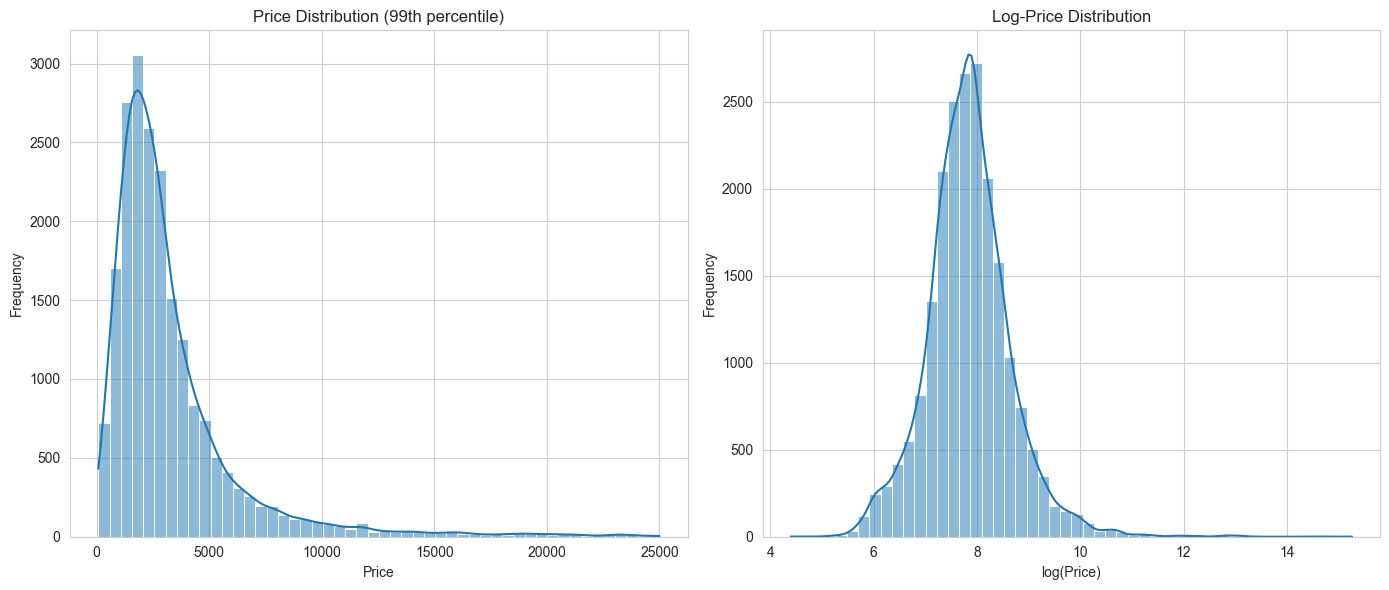

In [20]:
# Visualize price distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
upper_limit = train_df["price_num"].quantile(0.99)
sns.histplot(
    train_df.loc[train_df["price_num"] <= upper_limit, "price_num"],
    bins=50,
    kde=True
)
plt.title("Price Distribution (99th percentile)")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(
    np.log1p(train_df["price_num"].dropna()),
    bins=50,
    kde=True
)
plt.title("Log-Price Distribution")
plt.xlabel("log(Price)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


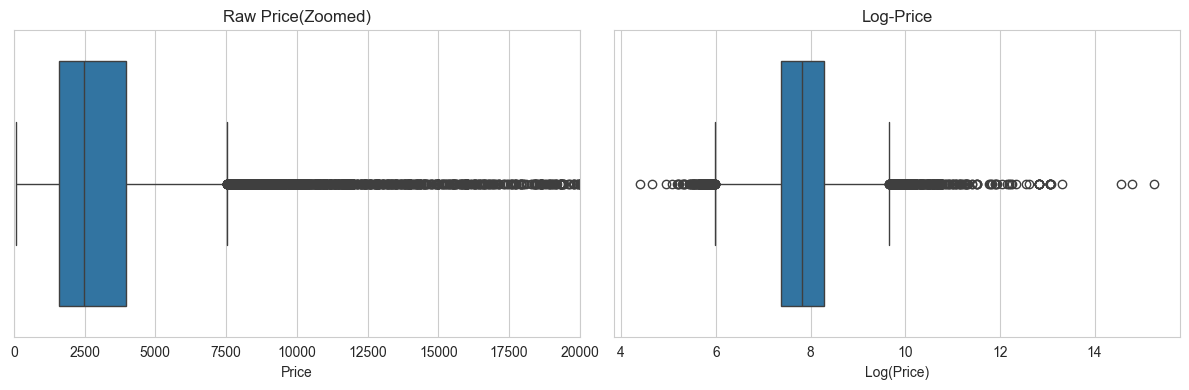

In [21]:
# Boxplots for price
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x=train_df["price_num"])
plt.title("Raw Price(Zoomed)")
plt.xlabel("Price")
plt.xlim(0, 20000)

plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(train_df["price_num"].dropna()))
plt.title("Log-Price")
plt.xlabel("Log(Price)")

plt.tight_layout()
plt.show()


,missing_ratio
neighbourhood_group_cleansed,1.000000
host_neighbourhood,0.886176
neighbourhood,0.710536
neighborhood_overview,0.710536
host_about,0.604115
license,0.439098
review_scores_value,0.363247
review_scores_checkin,0.363199
review_scores_location,0.363199
review_scores_accuracy,0.363199


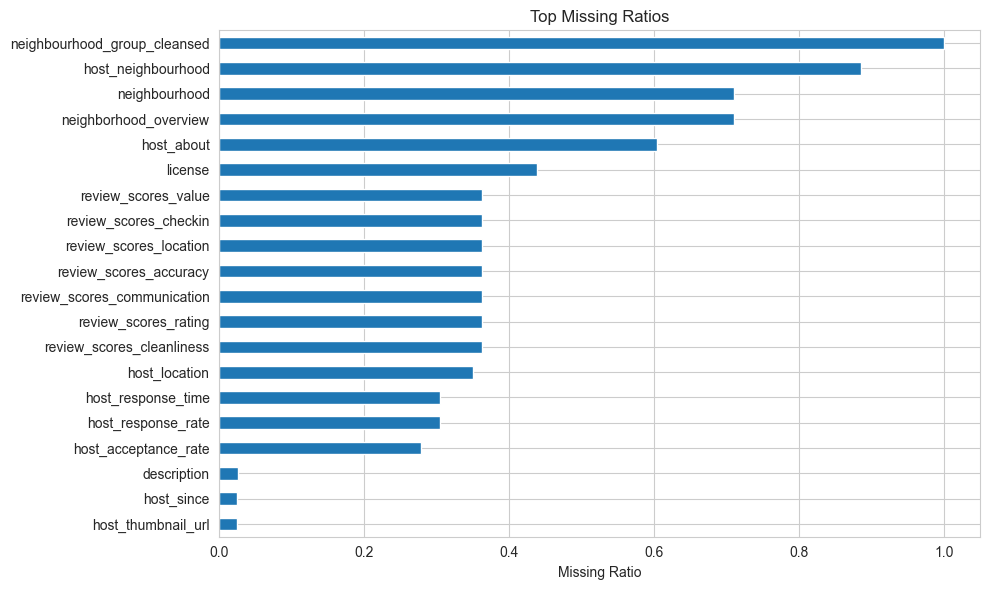

In [22]:
# Analyze missing values
trainable_df = train_df.dropna(subset=["price_num"]).copy()

missing_ratio = trainable_df.isna().mean().sort_values(ascending=False)

display(missing_ratio[missing_ratio > 0].to_frame("missing_ratio"))

missing_ratio[missing_ratio > 0].head(20)[::-1].plot(kind="barh", figsize=(10, 6))
plt.title("Top Missing Ratios")
plt.xlabel("Missing Ratio")
plt.tight_layout()
plt.show()


In [23]:
# Compare bathroom fields
bath_df = trainable_df[["bathrooms", "bathrooms_text"]].copy()

print("Missing ratio:")
print(bath_df.isna().mean())

display(bath_df.sample(10, random_state=42))


Missing ratio:
bathrooms         0.003845
bathrooms_text    0.004038
dtype: float64


,bathrooms,bathrooms_text
7465,1.0,1 bath
12625,2.0,2 baths
7237,1.0,1 bath
7390,1.0,1 bath
19155,1.0,1 bath
20186,1.0,1 private bath
22517,2.0,2 baths
2799,1.0,1 bath
3632,1.0,1 bath
1705,1.0,1 bath


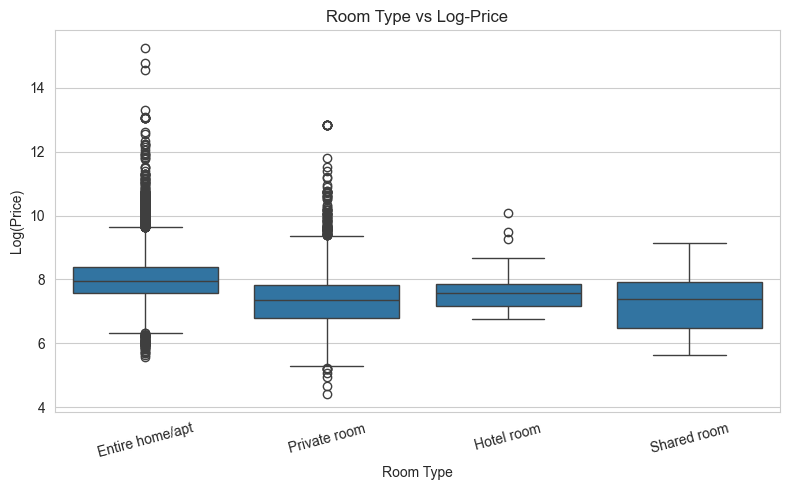

In [24]:
# Room type effect
trainable_df["log_price"] = np.log1p(trainable_df["price_num"])

plt.figure(figsize=(8, 5))
sns.boxplot(data=trainable_df, x="room_type", y="log_price")

plt.title("Room Type vs Log-Price")
plt.xlabel("Room Type")
plt.ylabel("Log(Price)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


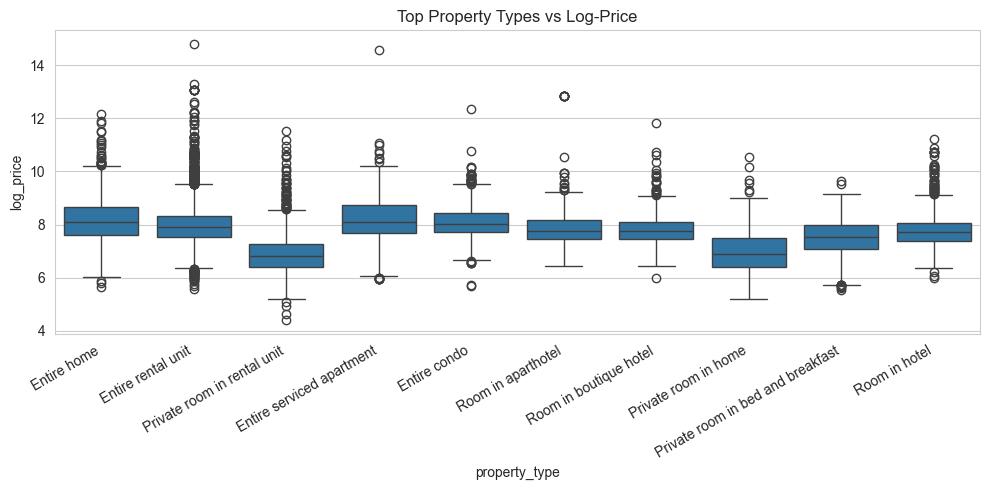

In [25]:
# Property type effect
top_property_types = (
    trainable_df["property_type"]
    .value_counts()
    .head(10)
    .index
)

plt.figure(figsize=(10, 5))
sns.boxplot(
    data=trainable_df[trainable_df["property_type"].isin(top_property_types)],
    x="property_type",
    y="log_price"
)
plt.title("Top Property Types vs Log-Price")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()



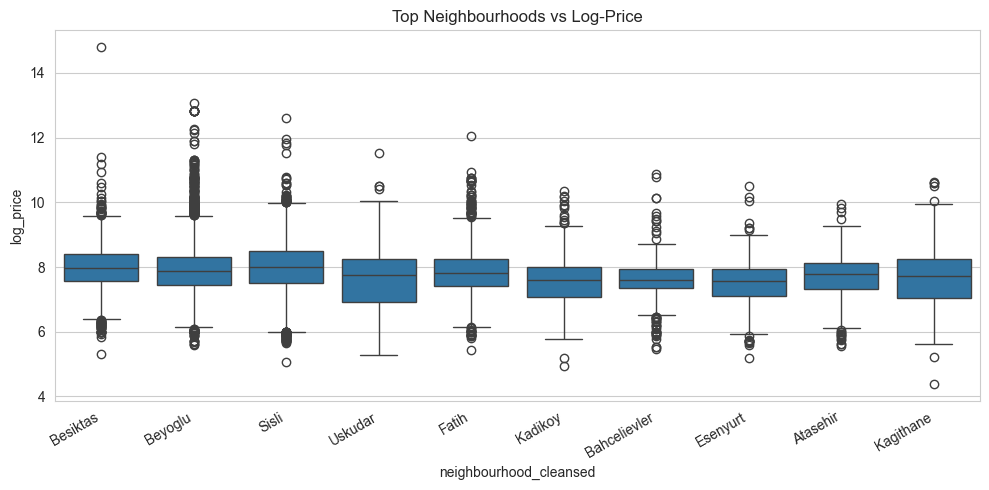

In [26]:
# Neighbourhood effect
top_neigh = (
    trainable_df["neighbourhood_cleansed"]
    .value_counts()
    .head(10)
    .index
)


plt.figure(figsize=(10, 5))
sns.boxplot(
    data=trainable_df[trainable_df["neighbourhood_cleansed"].isin(top_neigh)],
    x="neighbourhood_cleansed",
    y="log_price"
)
plt.title("Top Neighbourhoods vs Log-Price")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()



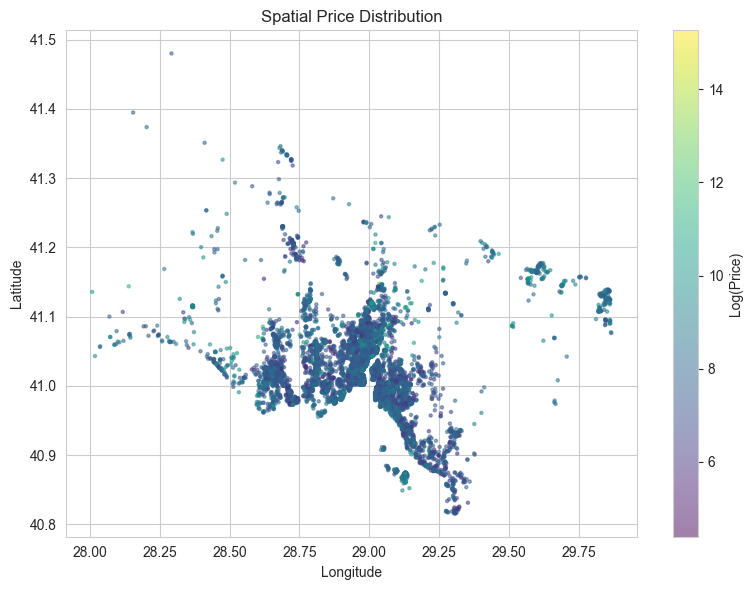

In [27]:
# Spatial distribution
plt.figure(figsize=(8, 6))
plt.scatter(
    trainable_df["longitude"],
    trainable_df["latitude"],
    c=trainable_df["log_price"],
    cmap="viridis",
    s=5,
    alpha=0.5
)
plt.colorbar(label="Log(Price)")
plt.title("Spatial Price Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


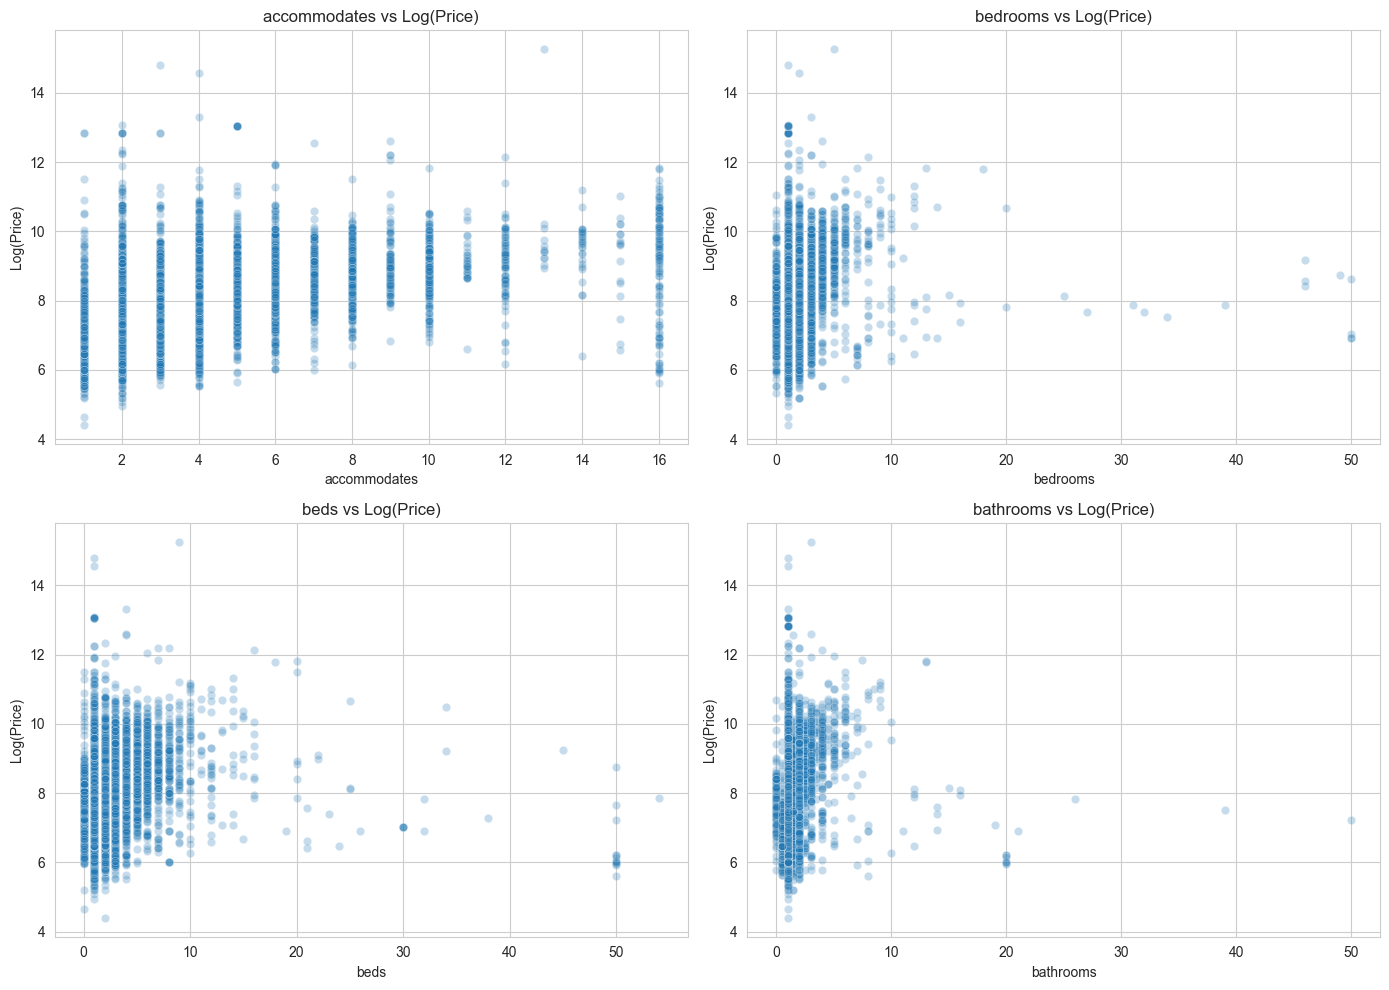

In [28]:
# Numeric features vs price
num_features = ["accommodates", "bedrooms", "beds", "bathrooms"]

plt.figure(figsize=(14, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=trainable_df, x=col, y="log_price", alpha=0.25)
    plt.title(f"{col} vs Log(Price)")
    plt.xlabel(col)
    plt.ylabel("Log(Price)")

plt.tight_layout()
plt.show()


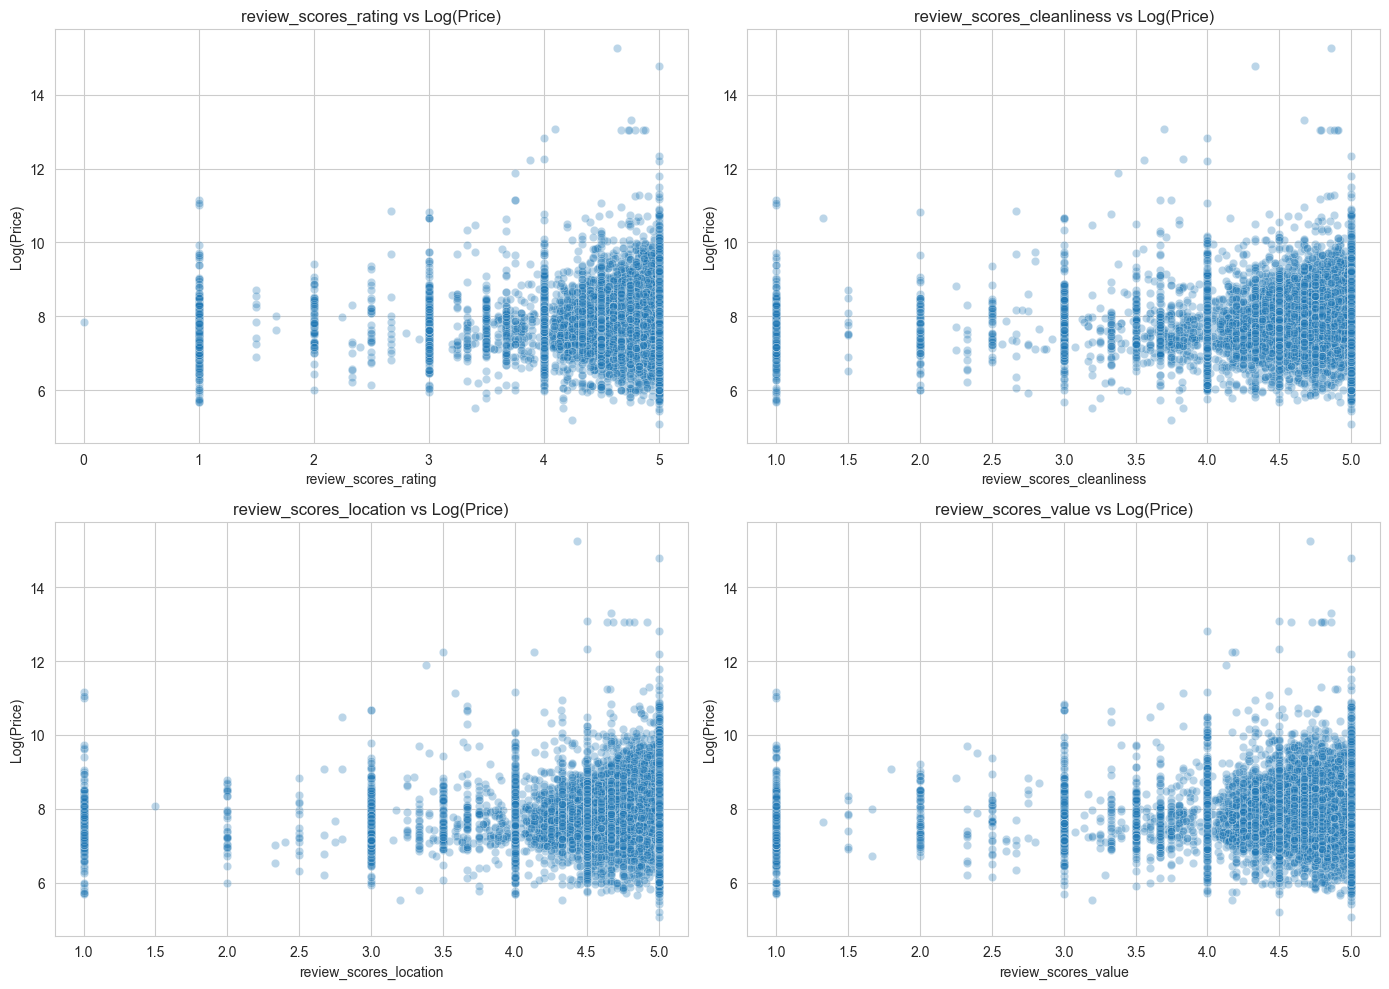

In [29]:
# Review scores vs price
review_cols = [
    "review_scores_rating",
    "review_scores_cleanliness",
    "review_scores_location",
    "review_scores_value"
]

plt.figure(figsize=(14, 10))
for i, col in enumerate(review_cols, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=trainable_df, x=col, y="log_price", alpha=0.3)
    plt.title(f"{col} vs Log(Price)")
    plt.xlabel(col)
    plt.ylabel("Log(Price)")

plt.tight_layout()
plt.show()


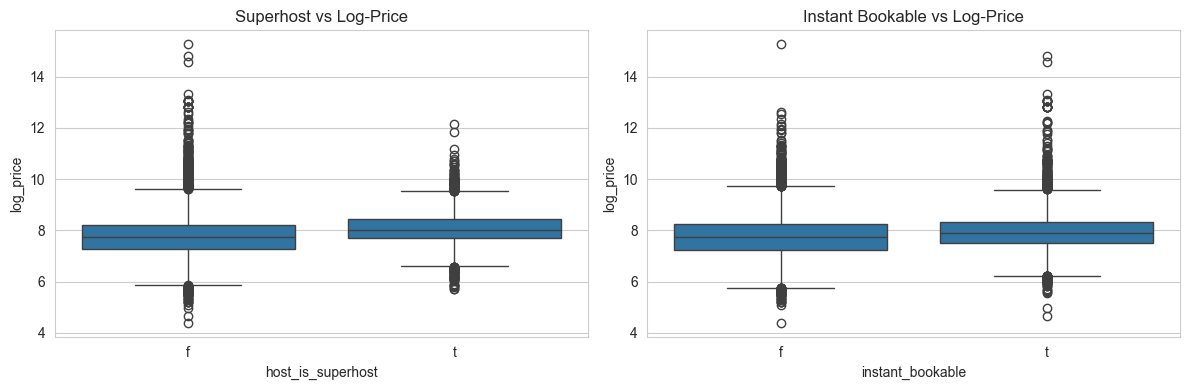

In [30]:
# Host features effect
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(data=trainable_df, x="host_is_superhost", y="log_price")
plt.title("Superhost vs Log-Price")

plt.subplot(1, 2, 2)
sns.boxplot(data=trainable_df, x="instant_bookable", y="log_price")
plt.title("Instant Bookable vs Log-Price")

plt.tight_layout()
plt.show()


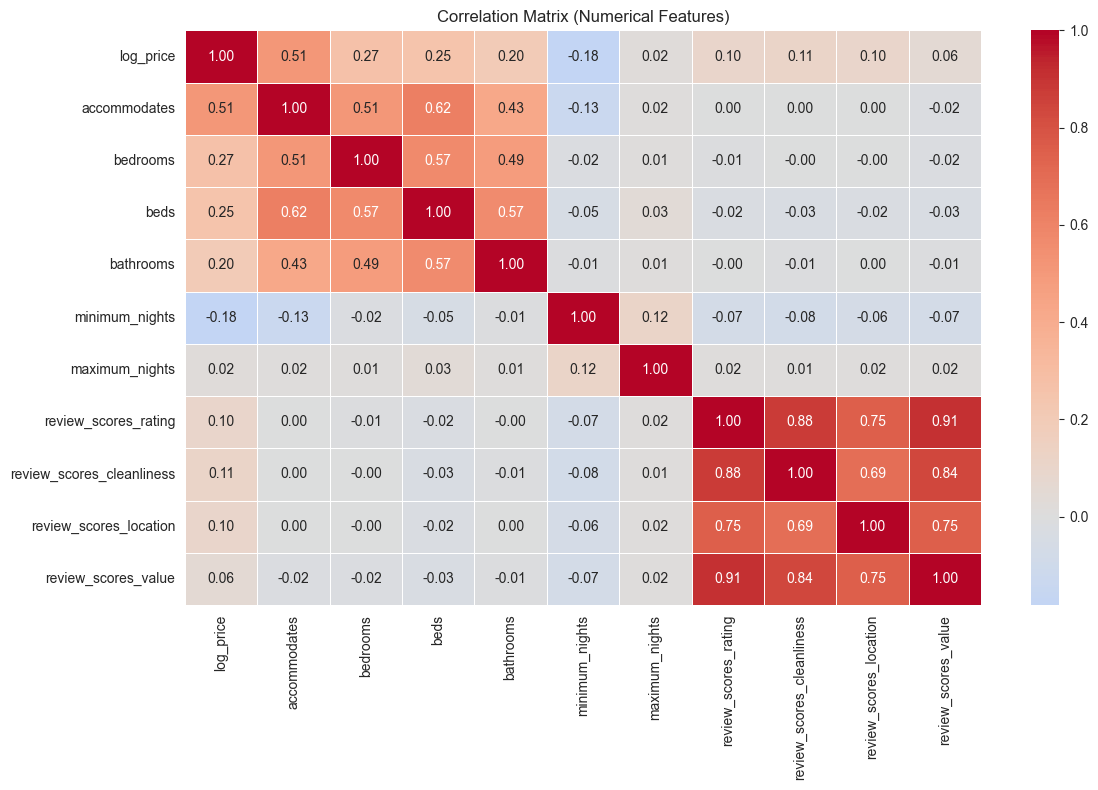

In [31]:
# Correlation matrix for numerical features
corr_features = [
    "log_price",
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "minimum_nights",
    "maximum_nights",
    "review_scores_rating",
    "review_scores_cleanliness",
    "review_scores_location",
    "review_scores_value"
]

corr_df = trainable_df[corr_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()


In [32]:
# Check train/test ID overlap
overlap = set(train_df["id"]).intersection(set(test_df["id"]))
print("Overlapping IDs:", len(overlap))
 

Overlapping IDs: 0


In [33]:
# Check date ranges
print("Calendar:", calendar_df["date"].min(), "->", calendar_df["date"].max())
print("Reviews :", reviews_df["date"].min(), "->", reviews_df["date"].max())


Calendar: 2025-06-27 -> 2026-07-01
Reviews : 2011-05-17 -> 2025-07-02
